In [50]:
import pandas as pd
import numpy as np
from PIL import Image
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
import os
import random

In [3]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()


(9850, 2)


,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


4251


Text(0.5,0,'image_id')

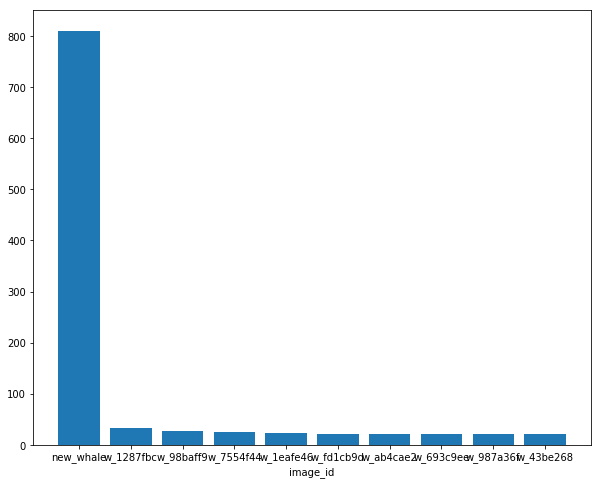

In [11]:
# number of calsses
gp = df.groupby('Id')
print (len(gp.count()))

ids = list(gp.count().sort_values(by = ['Image'], ascending = False).index)
counts = list(gp.count().sort_values(by = ['Image'], ascending = False)['Image'].values)

plt.figure(figsize = (10, 8))
plt.bar(ids[: 10], counts[: 10])
plt.xlabel('image_id')


In [49]:
gp.count().sort_values(by = ['Image'], ascending = False)

# more than 50% of the classes only have one training image 
gp.count().index[gp.count()['Image'] == 1].shape[0]/ gp.count().index.shape[0]


0.5222300635144672

2220

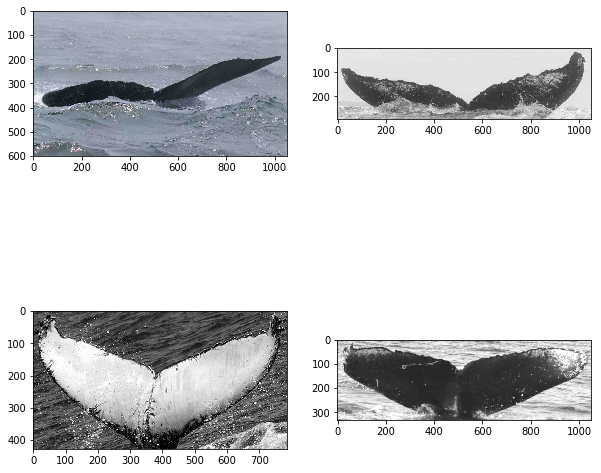

In [13]:
# sample a couple of images to show 

train_dir = './train'
sampled = 4
sampled_files = random.sample(os.listdir(train_dir), sampled)

sampled_imgs = [Image.open(train_dir + os.sep + sampled_files[i])
             for i in range(len(sampled_files))]

# plot
fig, subplots = plt.subplots(2, 2)
fig.set_size_inches(10, 10)
for i in range(len(sampled_imgs)):
    subplots[int(i / 2), i % 2].imshow(sampled_imgs[i])
    

In [20]:
# check training image sizes 

files = os.listdir(train_dir)
dirs = [train_dir + os.sep + i for i in files]

# image width and height 
width = []
height = []
for i in range(len(dirs)):
    img = Image.open(dirs[i])
    width.append(img.width)
    height.append(img.height)
     

Text(0.5,1,'image size')

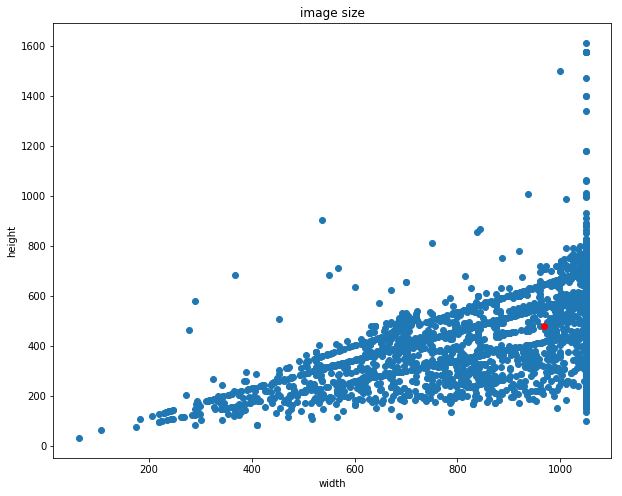

In [23]:
plt.figure(figsize = (10, 8))
plt.scatter(width, height)
plt.scatter(np.sum(width)/len(width), np.sum(height)/len(height), color = 'red')

plt.xlabel('width')
plt.ylabel('height')
plt.title('image size')


In [60]:
# check if there is gray scale image

gray = []
for i in range(len(dirs)):
    img = Image.open(dirs[i])
    img_array = image.img_to_array(img)
    if img_array.shape[-1] < 3:
        gray.append(dirs[i])

In [62]:
len(gray)

1469

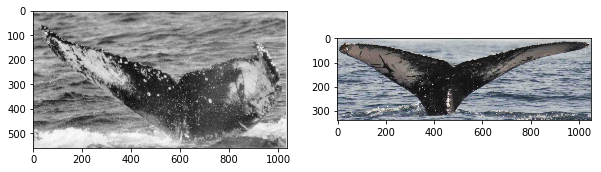

In [71]:
# show random gray and non gray images
non_gray = [i for i in dirs if i not in gray]

plt.figure(figsize = (10, 8))
plt.subplot(1, 2, 1)
plt.imshow(Image.open(gray[0]))
plt.subplot(1, 2, 2)
plt.imshow(Image.open(non_gray[0]))